## Train a simple convnet on the Fashion MNIST dataset

In [0]:
#pip install -U tensorflow --quiet

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
#import tensorflow as tf
import keras

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

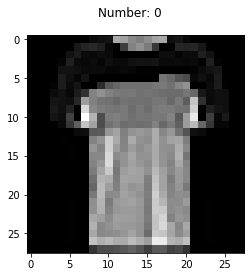

In [0]:
import matplotlib.pyplot as plt
import numpy as np

img_num = np.random.randint(0, x_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(x_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

In [0]:
from keras.utils import np_utils

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Both steps done at one step
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

In [0]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

In [0]:
Sequential()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
# Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model.fit(x_train, y_train, batch_size=BATCH_SIZE,nb_epoch=EPOCHS, 
             validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 28s 470us/step - loss: 0.3693 - acc: 0.8663 - val_loss: 0.3144 - val_acc: 0.8865
Epoch 2/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.2313 - acc: 0.9152 - val_loss: 0.2437 - val_acc: 0.9095
Epoch 3/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.1670 - acc: 0.9379 - val_loss: 0.2423 - val_acc: 0.9153
Epoch 4/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.1161 - acc: 0.9573 - val_loss: 0.2728 - val_acc: 0.9172
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0778 - acc: 0.9710 - val_loss: 0.3054 - val_acc: 0.9159
Epoch 6/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0505 - acc: 0.9815 - val_loss: 0.3740 - val_acc: 0.9144
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 91us/step
[0.49650015604533254, 0.911]


In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
 # Define Model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    
    # More Dropout
    model2.add(Dropout(0.5))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.5117 - acc: 0.8178 - val_loss: 0.3359 - val_acc: 0.8794
Epoch 2/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3493 - acc: 0.8745 - val_loss: 0.2984 - val_acc: 0.8926
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3037 - acc: 0.8911 - val_loss: 0.2530 - val_acc: 0.9068
Epoch 4/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.2736 - acc: 0.8997 - val_loss: 0.2440 - val_acc: 0.9096
Epoch 5/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2513 - acc: 0.9083 - val_loss: 0.2448 - val_acc: 0.9110
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.2334 - acc: 0.9137 - val_loss: 0.2248 - val_acc: 0.9188
Epoch 7/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2221 - acc: 0.9183 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

In [0]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.15))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

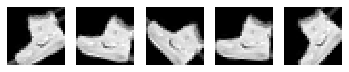

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6573 - acc: 0.7595 - val_loss: 0.4761 - val_acc: 0.8270
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4641 - acc: 0.8311 - val_loss: 0.4249 - val_acc: 0.8481
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4145 - acc: 0.8481 - val_loss: 0.3895 - val_acc: 0.8560
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3827 - acc: 0.8579 - val_loss: 0.3603 - val_acc: 0.8695
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3625 - acc: 0.8662 - val_loss: 0.3507 - val_acc: 0.8755
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3415 - acc: 0.8746 - val_loss: 0.3274 - val_acc: 0.8798
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3313 - acc: 0.8781 - val_loss: 0.3403 - val_acc: 0.8804
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [0]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 5s 87us/step
[0.24732203457752863, 0.9106666666666666]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import  cifar10

In [0]:
 (x_train_n, y_train_n), (x_test_n, y_test_n) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
y_train_n = np_utils.to_categorical(y_train_n, 10)
y_test_n = np_utils.to_categorical(y_test_n, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train_n.shape)
print(x_train_n.shape[0], 'train samples')
print(x_test_n.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen_n = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=60,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



In [0]:
x_train_n = x_train_n.astype('float32')
x_test_n = x_test_n.astype('float32')

In [0]:
x_train_n /= 255
x_test_n /= 255

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen_n.fit(x_train_n)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

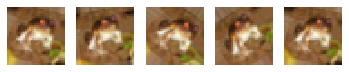

In [0]:
gen = datagen.flow(x_train_n[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()